# Modelo Probalístico
## Leandro León
Mediante este modelo nos dará la probanilidad de que los casos aumenten de manera rápida

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
url = 'covid_19_clean_complete.csv'
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed', 'Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,Date,Confirmed,Recovered
95,21,0,0
356,22,0,0
617,23,0,0
878,24,0,0
1139,25,0,0
...,...,...,...
47858,204,78148,33455
48119,205,79049,34544
48380,206,80036,34544
48641,207,80694,34896


<AxesSubplot:xlabel='Date'>

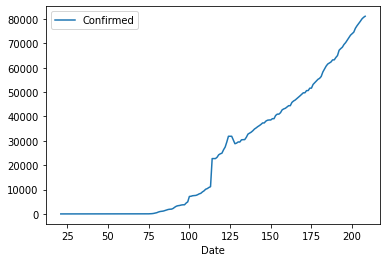

In [4]:
df.plot(x ='Date', y='Confirmed')

In [9]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
#z  = list(df.iloc [:, 2]) # Numero de recuperados
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestros modelos
regr.fit(np.array(x).reshape(-1, 1) ,y)

#regr.fit(np.array(x).reshape(-1, 1) ,z)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [451.62530905]
Independent term: 
 -26825.480865331312


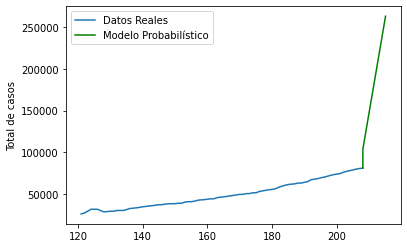

In [11]:
filtro = df["Confirmed"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
x4, y4 = [x[-1]], [y[-1]]
for i in range(x[-1], x[-1] + 8):
    x4.append(i)
    y4.append(int(y4[-1] + mediana))
mp.plot(x[100:], y[100:], label="Datos Reales")
mp.plot(x4, y4, label="Modelo Probabilístico", color="green")
mp.legend()
mp.ylabel("Total de casos")
mp.show()

In [12]:
probabilistica = int(y4[-1] + mediana)
# matriz de resultados
data = [[probabilistica]] 
  
# Create the pandas DataFrame 
resultados = pd.DataFrame(data, columns = [ 'Probabilistico']) 
resultados

,Probabilistico
0,285632


### Según este modelo los casos aumentarán de manera rápida en base a los datos de mese anteriores